<a href="https://colab.research.google.com/github/sourav03dutta/Global-Terrorism-Analysis/blob/main/Global_Terrorism_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Global Terrorism Database (GTD) is an open-source database including information on terrorist attacks around the world from 1970 through 2017. The GTD includes systematic data on domestic as well as international terrorist incidents that have occurred during this time period and now includes more than 180,000 attacks. The database is maintained by researchers at the National Consortium for the Study of Terrorism and Responses to Terrorism (START), headquartered at the University of Maryland.</b>

# <b> Explore and analyze the data to discover key findings pertaining to terrorist activities. </b>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
#Mounting Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
working_dir_path = '/content/drive/My Drive/Almabetter Projects/Exploratory Data Analysis/Global Terrorism Analysis/'

In [ ]:
Terror_Data = pd.read_csv(working_dir_path + 'Global Terrorism Data.csv' , encoding='latin-1')
#encoding='latin-1' : ISO 8859-1 is the ISO standard Latin-1 character set and encoding format.
#The latin-1 encoding in Python implements which maps all possible byte values to the first 256 Unicode code points. 
#It ensures decoding errors will never occur regardless of the configured error handler.
Terror_Data.head()

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


**DATA CLEANING** :- Data cleaning or data scrubbing, is the process of fixing incorrect, incomplete, duplicate or otherwise erroneous data in a data set. It involves identifying data errors and then changing, updating or removing data to correct them. Data cleansing improves data quality and helps provide more accurate, consistent and reliable information for decision-making in an organization.

Lets start with Data Cleaning !!!

In [ ]:
Terror_Data.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [ ]:
Terror_Data.info(verbose = True) #verbose = True means to ask the programme or data set to tell everything. It also means to give information in extended form.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 135 columns):
 #    Column              Dtype  
---   ------              -----  
 0    eventid             int64  
 1    iyear               int64  
 2    imonth              int64  
 3    iday                int64  
 4    approxdate          object 
 5    extended            int64  
 6    resolution          object 
 7    country             int64  
 8    country_txt         object 
 9    region              int64  
 10   region_txt          object 
 11   provstate           object 
 12   city                object 
 13   latitude            float64
 14   longitude           float64
 15   specificity         float64
 16   vicinity            int64  
 17   location            object 
 18   summary             object 
 19   crit1               int64  
 20   crit2               int64  
 21   crit3               int64  
 22   doubtterr           float64
 23   alternative         float64
 24 

In [ ]:
Terror_Data.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','city':'City','country_txt':'Country','region_txt':'Region','provstate':'State','latitude':'Latitude','longitude':'Longitude','attacktype1_txt':'Attack Type','target1':'Target','nkill':'Killed','nwound':'Wounded','summary':'Summary','gname':'Terrorist Group','targtype1_txt':'Target Type','weaptype1_txt':'Weapon Type','motive':'Motive'},inplace=True)

In [ ]:
Terror_Data = Terror_Data[['Year','Month','Day','City','State','Country','Region','Latitude','Longitude','Attack Type','Killed','Wounded','Target','Target Type','Terrorist Group','Weapon Type','Motive','Summary']]

In [ ]:
 Terror_Data.head() #Extracting the new data after data cleaning

,Year,Month,Day,City,State,Country,Region,Latitude,Longitude,Attack Type,Killed,Wounded,Target,Target Type,Terrorist Group,Weapon Type,Motive,Summary
0,1970,7,2,Santo Domingo,NaN,Dominican Republic,Central America & Caribbean,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,Private Citizens & Property,MANO-D,Unknown,NaN,NaN
1,1970,0,0,Mexico city,Federal,Mexico,North America,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",Government (Diplomatic),23rd of September Communist League,Unknown,NaN,NaN
2,1970,1,0,Unknown,Tarlac,Philippines,Southeast Asia,15.478598,120.599741,Assassination,1.0,0.0,Employee,Journalists & Media,Unknown,Unknown,NaN,NaN
3,1970,1,0,Athens,Attica,Greece,Western Europe,37.997490,23.762728,Bombing/Explosion,NaN,NaN,U.S. Embassy,Government (Diplomatic),Unknown,Explosives,NaN,NaN
4,1970,1,0,Fukouka,Fukouka,Japan,East Asia,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,U.S. Consulate,Government (Diplomatic),Unknown,Incendiary,NaN,NaN


In [ ]:
Terror_Data.isnull().sum()

Year                    0
Month                   0
Day                     0
City                  434
State                 421
Country                 0
Region                  0
Latitude             4556
Longitude            4557
Attack Type             0
Killed              10313
Wounded             16311
Target                636
Target Type             0
Terrorist Group         0
Weapon Type             0
Motive             131130
Summary             66129
dtype: int64

In [ ]:
Terror_Data['Killed']=Terror_Data['Killed'].fillna(0)
Terror_Data['Wounded']=Terror_Data['Wounded'].fillna(0)
Terror_Data['Casualties']=Terror_Data['Killed']+Terror_Data['Wounded']

In [ ]:
Terror_Data.describe()

,Year,Month,Day,Latitude,Longitude,Killed,Wounded,Casualties
count,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181691.000000,181691.000000,181691.000000
mean,2002.638997,6.467277,15.505644,23.498343,-4.586957e+02,2.266860,2.883296,5.150156
std,13.259430,3.388303,8.814045,18.569242,2.047790e+05,11.227057,34.309747,40.555416
min,1970.000000,0.000000,0.000000,-53.154613,-8.618590e+07,0.000000,0.000000,0.000000
25%,1991.000000,4.000000,8.000000,11.510046,4.545640e+00,0.000000,0.000000,0.000000
50%,2009.000000,6.000000,15.000000,31.467463,4.324651e+01,0.000000,0.000000,1.000000
75%,2014.000000,9.000000,23.000000,34.685087,6.871033e+01,2.000000,2.000000,4.000000
max,2017.000000,12.000000,31.000000,74.633553,1.793667e+02,1570.000000,8191.000000,9574.000000


Now lets start with **Exploratory Data Analysis** :-

**Objective 1 -** *In which year highest and least number of Terrorist activities took place?*

In [ ]:
Attack_Year=Terror_Data['Year'].value_counts(dropna=False).sort_index().to_frame().reset_index().rename(columns={'index':'Year','Year':'Attacks'}).set_index('Year')
Attack_Year.head()

,Attacks
Year,
1970,651
1971,471
1972,568
1973,473
1974,581


In [ ]:
Attack_Year.describe()

,Attacks
count,47.000000
mean,3865.765957
std,3836.943826
min,471.000000
25%,1364.000000
50%,2870.000000
75%,4503.500000
max,16903.000000


Text(0.5, 1.0, 'Number of Terrorist Activities each Year')

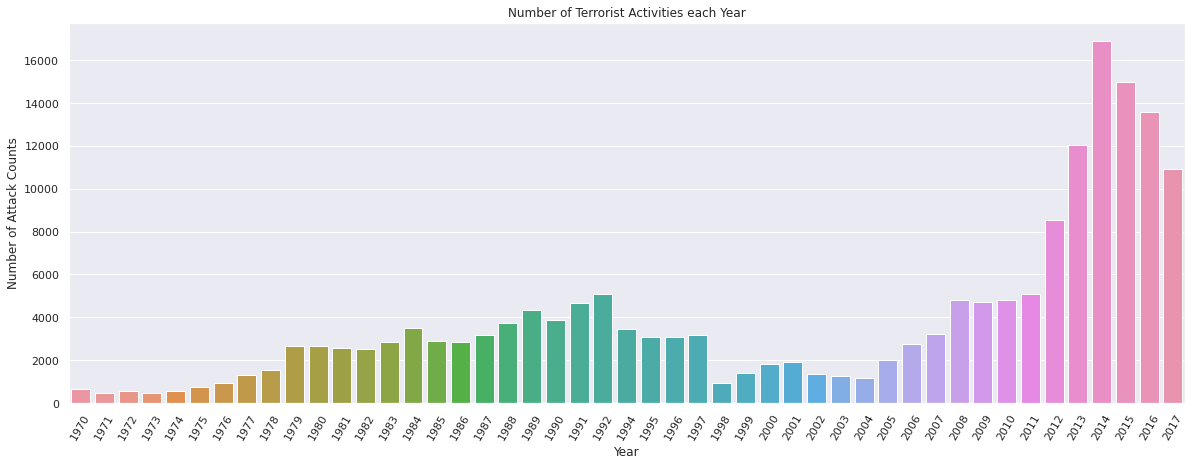

In [ ]:
Figure = plt.figure(figsize=(20, 7))

sns.set()
sns.set_theme(style = "darkgrid")
xaxis = sns.countplot(x = 'Year', data = Terror_Data)
plt.xticks(rotation=60)
plt.ylabel('Number of Attack Counts')
plt.xlabel('Year')
plt.title('Number of Terrorist Activities each Year')

From the above analysis, we concluded that the highest number of Terrorist activities took place in the year 2014 with 16903 attacks. The least number of attacks took place in the year 1971 with 471 attacks.

**Objective 2 -** *How many attacks occured in the year 1970 and 2017? Find the percentage of attack increased between 1970 and 2017?*

In [ ]:
Year=Terror_Data.Year.value_counts().to_dict()
Percentage = (Year[2017]-Year[1970])/Year[2017]*100
print(Year[1970],'attacks occured in the year 1970 &',Year[2017],'attacks occured in the year 2017')
print('The percentage of attack increased between 1970 and 2017 is', Percentage,'%')

651 attacks occured in the year 1970 & 10900 attacks occured in the year 2017
The percentage of attack increased between 1970 and 2017 is 94.02752293577981 %


**Objective 3 -** *Find the Correlation between 'Killed' and 'Wounded' in the data frame?*

**Correlation Analysis** in research is a statistical method used to measure the strength of the linear relationship between two variables and compute their association.

In [ ]:
df = Terror_Data.loc[:,['Killed', 'Wounded']]

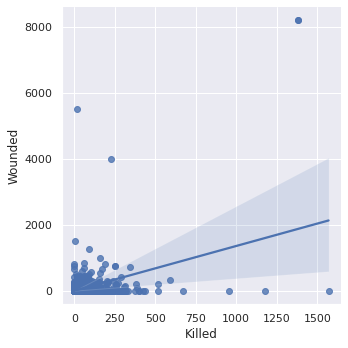

In [ ]:
sns.lmplot(x='Killed', y='Wounded', data=df)

In [ ]:
df.corr()

,Killed,Wounded
Killed,1.000000,0.443326
Wounded,0.443326,1.000000


Correlation Heatmap

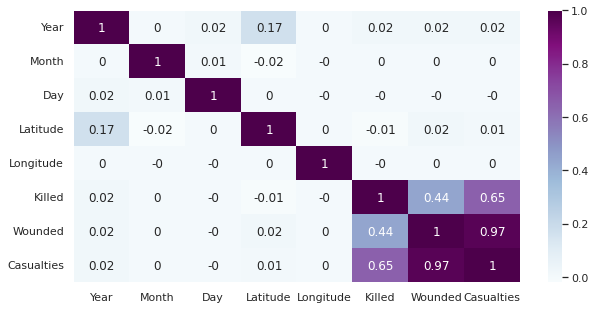

In [ ]:
plt.figure(figsize=(10,5))
sns.heatmap(np.round(Terror_Data.corr(),2), cmap='BuPu', annot=True)

From the above analysis, I concluded that both variables, i.e. 'Killed' and 'Wounded' have **Low Positive Correlation**.

**Objective 4 -** *What are the type of attacks done by terrorists and also find the highest and least number of Attack Type?* 

In [ ]:
Attack_Attack_Type=Terror_Data['Attack Type'].value_counts(dropna=False).sort_index().to_frame().reset_index().rename(columns={'index':'Attack Type','Attack Type':'Attacks'}).set_index('Attack Type')
Attack_Attack_Type.head(9)

,Attacks
Attack Type,
Armed Assault,42669
Assassination,19312
Bombing/Explosion,88255
Facility/Infrastructure Attack,10356
Hijacking,659
Hostage Taking (Barricade Incident),991
Hostage Taking (Kidnapping),11158
Unarmed Assault,1015
Unknown,7276


Text(0.5, 1.0, 'Types of Terrorist Attack')

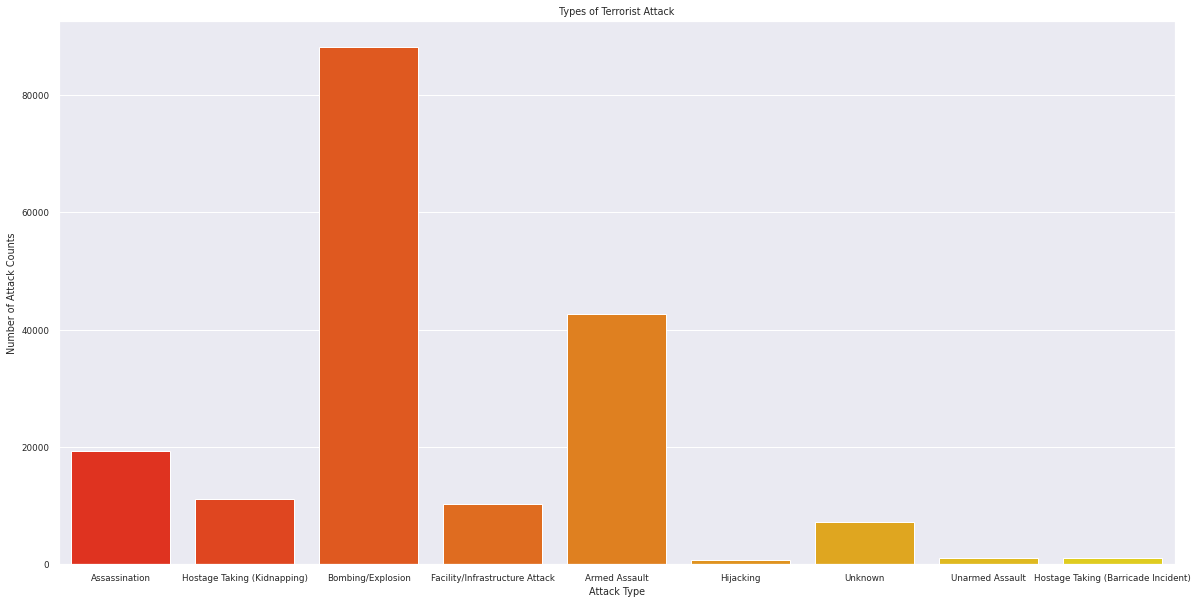

In [ ]:
Figure = plt.figure(figsize=(20,10))

sns.set(font_scale=0.8)
sns.countplot(x='Attack Type', data=Terror_Data, palette='autumn')
plt.xlabel('Attack Type')
plt.ylabel('Number of Attack Counts')
plt.title('Types of Terrorist Attack')

Hence from the above bar graph, types of attack done by terrorists are :-
1. Assassination
2. Hostage Taking(Kidnapping)
3. Bombing/Explosion
4. Fascility/Infrastructure Attack
5. Armed Assault
6. Hijacking
7. Unarmed Assault
8. Hostage Taking(Barricade Incident)
and few are unknowns as per the given data.

The highest number of Attack Type is Bombing/Explosion - 88255. The least number of Attack Type is Hijacking - 651 attacks.

**Objective 5 -** *Which is the most Target Type by Terrorists?*

In [ ]:
Attack_Target_Type=Terror_Data['Target Type'].value_counts(dropna=False).sort_index().to_frame().reset_index().rename(columns={'index':'Target Type','Target Type':'Target Counts'}).set_index('Target Type')
Attack_Target_Type.head(22)

,Target Counts
Target Type,
Abortion Related,263
Airports & Aircraft,1343
Business,20669
Educational Institution,4322
Food or Water Supply,317
Government (Diplomatic),3573
Government (General),21283
Journalists & Media,2948
Maritime,351


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Types of Target')

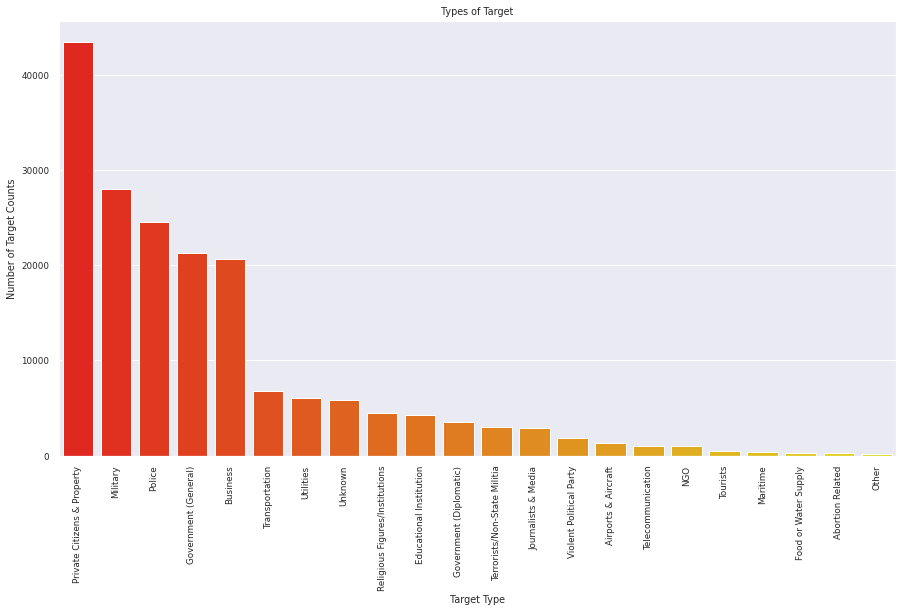

In [ ]:
Figure = plt.figure(figsize=(15,8))

sns.set(font_scale=0.8)
sns.countplot(Terror_Data['Target Type'], order=Terror_Data['Target Type'].value_counts().index, palette='autumn')
plt.xticks(rotation=90)
plt.xlabel('Target Type')
plt.ylabel('Number of Target Counts')
plt.title('Types of Target')

The most Target Type by Terrorist is Private Citizens & Property. The second most Target Type is Military and then Police.

**Objective 6 -** *Which country is most and least affected by terrorism (top 20)?*

In [ ]:
Attack_Country=Terror_Data['Country'].value_counts(dropna=False)[0:20].sort_index().to_frame().reset_index().rename(columns={'index':'Country','Country':'Attack Counts'}).set_index('Country')
Attack_Country

,Attack Counts
Country,
Afghanistan,12731
Algeria,2743
Colombia,8306
Egypt,2479
El Salvador,5320
France,2693
India,11960
Iraq,24636
Nigeria,3907


In [ ]:
Maximum_country_attack_counts=Attack_Country.max()
Maximum_attack_country=Attack_Country.idxmax().max()
print(Maximum_country_attack_counts)
print(Maximum_attack_country)

Attack Counts    24636
dtype: int64
Iraq


In [ ]:
Minimum_country_attack_counts=Attack_Country.min()
Minimum_attack_country=Attack_Country.idxmin().min()
print(Minimum_country_attack_counts)
print(Minimum_attack_country)

Attack Counts    2479
dtype: int64
Egypt


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Terrorist Attack in different countries (TOP 20)')

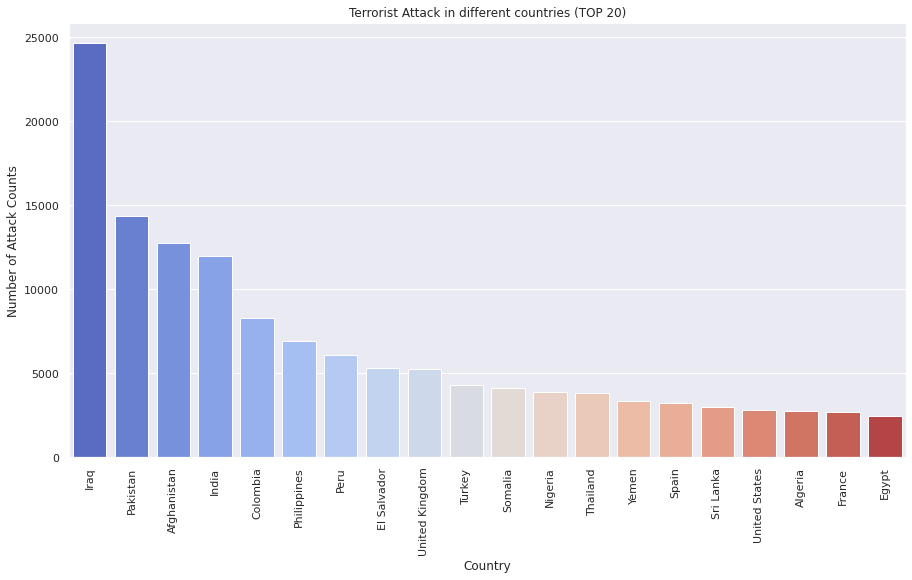

In [ ]:
Figure = plt.figure(figsize=(15,8))

sns.set(font_scale=1.0)
sns.countplot(Terror_Data['Country'], order=Terror_Data['Country'].value_counts()[0:20].index, palette='coolwarm')
plt.xticks(rotation=90)
plt.xlabel('Country')
plt.ylabel('Number of Attack Counts')
plt.title('Terrorist Attack in different countries (TOP 20)')

TOP 20
1. The most affected country is Iraq - 24636 attacks.
2. The least affected country is Egypt - 2479 attacks.                                                     

**Objective 7 -** *Which region is most affected by terrorism?*

In [ ]:
Attack_Region=Terror_Data['Region'].value_counts(dropna=False).sort_index().to_frame().reset_index().rename(columns={'index':'Region','Region':'Attack Counts'}).set_index('Region')
Attack_Region.head(12)

,Attack Counts
Region,
Australasia & Oceania,282
Central America & Caribbean,10344
Central Asia,563
East Asia,802
Eastern Europe,5144
Middle East & North Africa,50474
North America,3456
South America,18978
South Asia,44974


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Terrorist Attack in different Region')

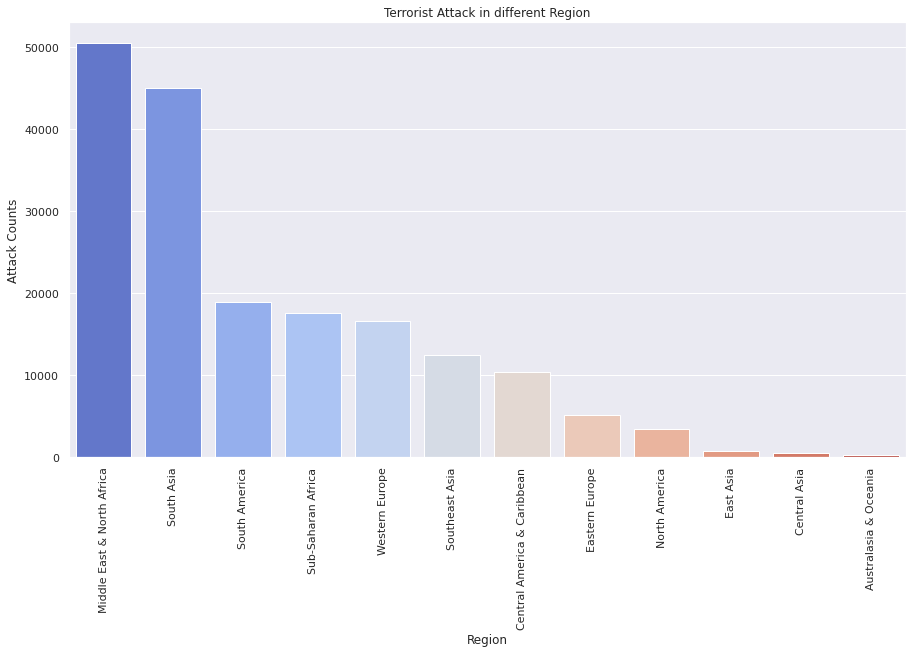

In [ ]:
Figure = plt.figure(figsize=(15,8))

sns.set(font_scale=1.0)
sns.countplot(Terror_Data['Region'], order=Terror_Data['Region'].value_counts().index, palette='coolwarm')
plt.xticks(rotation=90)
plt.xlabel('Region')
plt.ylabel('Attack Counts')
plt.title('Terrorist Attack in different Region')

 The most affected region is Middle East and North Africa - 50474 attacks.

**Objective 8 -** *Which city is most and least affected by terrorism (top 15)?*

In [ ]:
Attack_City=Terror_Data['City'].value_counts()[1:15].sort_index().to_frame().reset_index().rename(columns={'index':'City','City':'Attack Counts'}).set_index('City')
Attack_City

,Attack Counts
City,
Athens,1019
Baghdad,7589
Beirut,918
Belfast,2171
Bogota,984
Istanbul,1048
Karachi,2652
Kirkuk,925
Lima,2359


In [ ]:
Maximum_city_attack_counts=Attack_City.max()
Maximum_attack_city=Attack_City.idxmax().max()
print(Maximum_city_attack_counts)
print(Maximum_attack_city)

Attack Counts    7589
dtype: int64
Baghdad


In [ ]:
Minimum_city_attack_counts=Attack_City.min()
Minimum_attack_city=Attack_City.idxmin().min()
print(Minimum_city_attack_counts)
print(Minimum_attack_city)

Attack Counts    848
dtype: int64
Medellin


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Terrorist Attack in different City (TOP 15)')

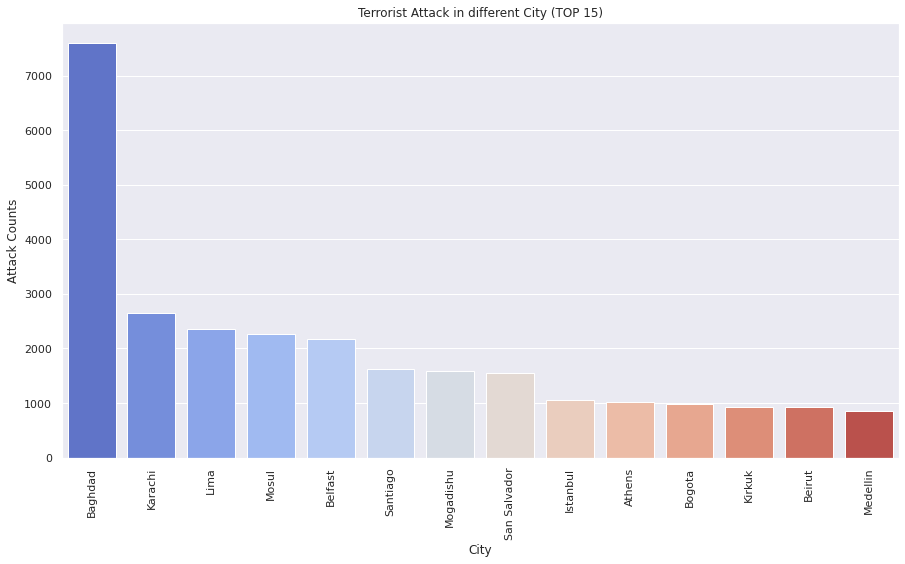

In [ ]:
Figure = plt.figure(figsize=(15,8))

sns.set(font_scale=1.0)
sns.countplot(Terror_Data['City'], order=Terror_Data['City'].value_counts()[1:15].index, palette='coolwarm')
plt.xticks(rotation=90)
plt.xlabel('City')
plt.ylabel('Attack Counts')
plt.title('Terrorist Attack in different City (TOP 15)')

TOP 15
1. The most affected city is Baghdad - 9775 attacks.
2. The least affected city is Medellin - 848 attacks.

**Objective 9 -** *Which is the most active terrorist organization (Top 15)?*

In [ ]:
Attack_Terrorist_Group=Terror_Data['Terrorist Group'].value_counts(dropna=False)[1:15].sort_index().to_frame().reset_index().rename(columns={'index':'Terrorist Group','Terrorist Group':'Attack Counts'}).set_index('Terrorist Group')
Attack_Terrorist_Group

,Attack Counts
Terrorist Group,
Al-Shabaab,3288
Basque Fatherland and Freedom (ETA),2024
Boko Haram,2418
Communist Party of India - Maoist (CPI-Maoist),1878
Farabundo Marti National Liberation Front (FMLN),3351
Irish Republican Army (IRA),2671
Islamic State of Iraq and the Levant (ISIL),5613
Kurdistan Workers' Party (PKK),2310
Liberation Tigers of Tamil Eelam (LTTE),1606


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Most Active Terrorist Organization (TOP 15)')

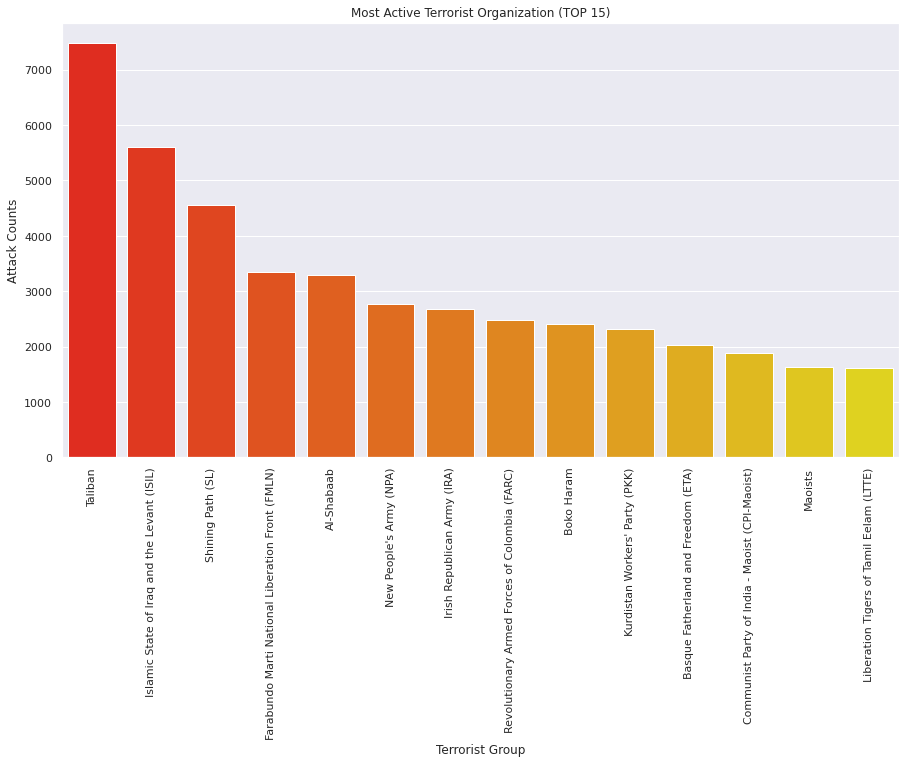

In [ ]:
Figure = plt.figure(figsize=(15,8))

sns.set(font_scale=1.0)
sns.countplot(Terror_Data['Terrorist Group'], order=Terror_Data['Terrorist Group'].value_counts()[1:15].index, palette='autumn')
plt.xticks(rotation=90)
plt.xlabel('Terrorist Group')
plt.ylabel('Attack Counts')
plt.title('Most Active Terrorist Organization (TOP 15)')

Taliban is the most Active Terrorist Organization.

**Objective 10 -** *Analyse the trend of number of attacks per region by year?* 

In [ ]:
Attacks_Region_Year = pd.crosstab(Terror_Data.Year, Terror_Data.Region)
Attacks_Region_Year.head(10)

Region,Australasia & Oceania,Central America & Caribbean,Central Asia,East Asia,Eastern Europe,Middle East & North Africa,North America,South America,South Asia,Southeast Asia,Sub-Saharan Africa,Western Europe
Year,,,,,,,,,,,,
1970,1,7,0,2,12,28,472,65,1,10,3,50
1971,1,5,0,1,5,55,247,24,0,6,2,125
1972,8,3,0,0,1,53,73,33,1,16,4,376
1973,1,6,0,2,1,19,64,83,1,2,4,290
1974,1,11,0,4,2,42,111,81,2,3,7,317
1975,0,9,0,12,0,44,159,55,4,7,12,438
1976,0,45,0,2,0,55,125,91,4,12,11,578
1977,0,24,0,4,2,211,149,119,2,8,29,771
1978,2,199,0,35,2,128,117,222,2,44,46,729


Text(0.5, 1.0, 'Number of Attacks per Region by Year')

<Figure size 1440x720 with 0 Axes>

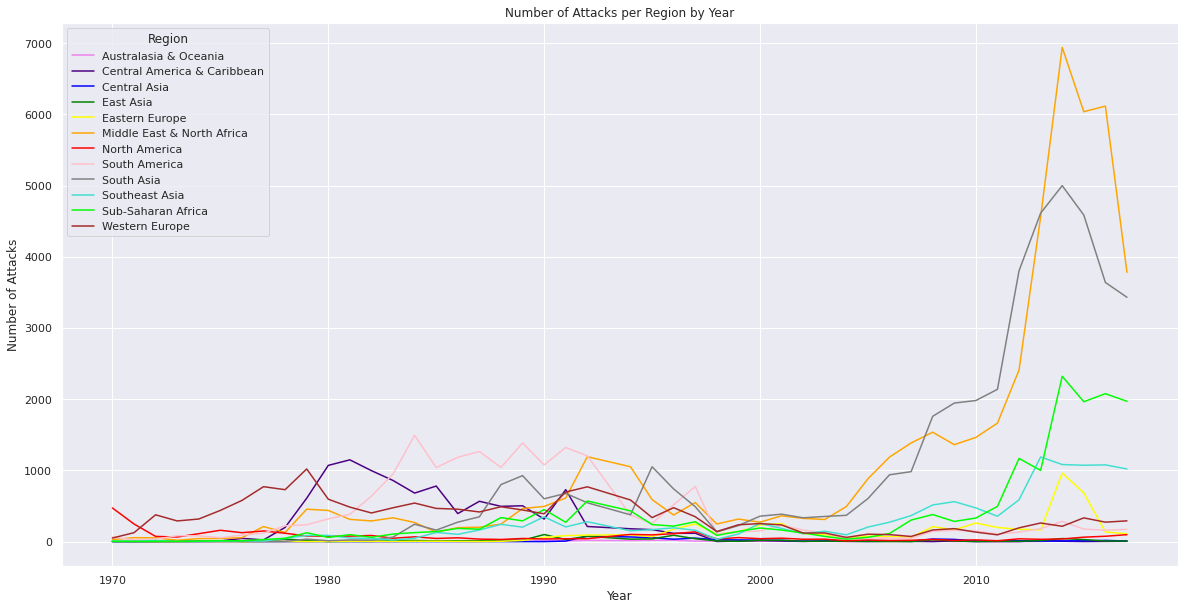

In [ ]:
Figure = plt.figure(figsize=(20, 10))

Color_list= ['violet', 'indigo', 'blue', 'green', 'yellow', 'orange', 'red', 'pink', 'grey', 'turquoise', 'lime', 'brown']
Attacks_Region_Year.plot(figsize=(20, 10), color=Color_list)
plt.xlabel('Year')
plt.ylabel('Number of Attacks')
plt.title('Number of Attacks per Region by Year')

In the year 1970 to 2000, the terrorist activities were vey frequent. After 2010, we can see the rise of terrorist activity in Middle East and North Africa, South Asia and Sub Saharan Desert.

**OBJECTIVE 11 -** *Find out the total number of people Killed,Wounded and Casualties in each (TOP 10) Region?*

In [ ]:
Region_Killed=Terror_Data[['Region','Killed']].groupby('Region').sum().sort_values(by='Killed',ascending=False)
Region_Killed.head(10)

,Killed
Region,
Middle East & North Africa,137642.0
South Asia,101319.0
Sub-Saharan Africa,78386.0
South America,28849.0
Central America & Caribbean,28708.0
Southeast Asia,15637.0
Eastern Europe,7415.0
Western Europe,6694.0
North America,4916.0


In [ ]:
Region_Wounded=Terror_Data[['Region','Wounded']].groupby('Region').sum().sort_values(by='Wounded',ascending=False)
Region_Wounded.head(10)

,Wounded
Region,
Middle East & North Africa,214308.0
South Asia,141360.0
Sub-Saharan Africa,52857.0
Southeast Asia,26259.0
North America,21531.0
Western Europe,18332.0
South America,16704.0
Eastern Europe,12045.0
East Asia,9213.0


Text(0.5, 1.0, 'Total number of people wounded in each region (TOP 10)')

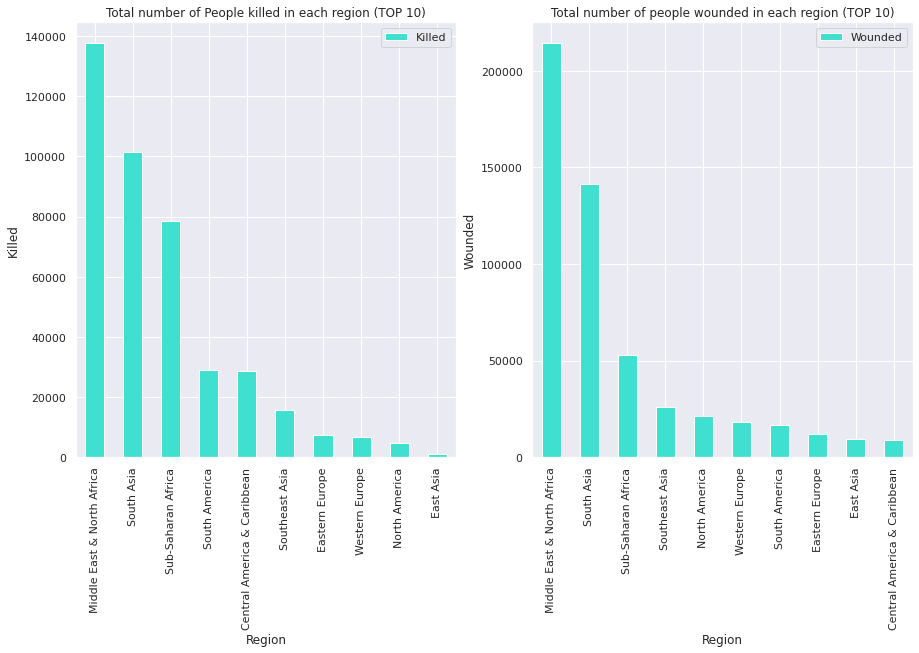

In [ ]:
Figure = plt.figure(figsize=(15,8))
ax0=Figure.add_subplot(1,2,1)
ax1=Figure.add_subplot(1,2,2)

Region_Killed[:10].plot(kind='bar', color='Turquoise', ax=ax0)
plt.xticks(rotation=90)
ax0.set_xlabel('Region')
ax0.set_ylabel('Killed')
ax0.set_title('Total number of People killed in each region (TOP 10)')

Region_Wounded[:10].plot(kind='bar', color='Turquoise', ax=ax1)
plt.xticks(rotation=90)
ax1.set_xlabel('Region')
ax1.set_ylabel('Wounded')
ax1.set_title('Total number of people wounded in each region (TOP 10)')

In [ ]:
Region_Casualties=Terror_Data[['Region','Casualties']].groupby('Region').sum().sort_values(by='Casualties',ascending=False)
Region_Casualties.head(10)

,Casualties
Region,
Middle East & North Africa,351950.0
South Asia,242679.0
Sub-Saharan Africa,131243.0
South America,45553.0
Southeast Asia,41896.0
Central America & Caribbean,37699.0
North America,26447.0
Western Europe,25026.0
Eastern Europe,19460.0


Text(0.5, 1.0, 'Total number of people casualties in each region (TOP 10)')

<Figure size 1080x576 with 0 Axes>

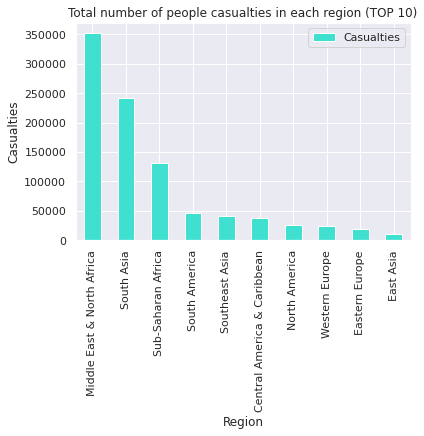

In [ ]:
Figure = plt.figure(figsize=(15,8))

Region_Casualties[:10].plot(kind='bar', color='Turquoise')
plt.xticks(rotation=90)
plt.xlabel('Region')
plt.ylabel('Casualties')
plt.title('Total number of people casualties in each region (TOP 10)')

Total number of people killed in each region (TOP 10) :-
1. Maximum - Middle East and North Africa - 137642 people killed.
2. Minimum - East Asia - 1152 people killed.

Total number of people wounded in each region (TOP 10) :-
1. Maximum - Middle East and North Africa - 214308 people wounded.
2. Minimum - Central America and Caribbean - 8991 people wounded.

Total number of people casualties in each region (TOP 10) :-
1. Maximum - Middle East and North Africa - 351950 people casualties.
2. Minimum - East Asia - 10365 people casualties.

**OBJECTIVE 12 -** *Find out the total number of people Killed,Wounded and Casualties in each (TOP 10) Country?*

In [ ]:
Country_Killed=Terror_Data[['Country','Killed']].groupby('Country').sum().sort_values(by='Killed',ascending=False)
Country_Killed.head(10)

,Killed
Country,
Iraq,78589.0
Afghanistan,39384.0
Pakistan,23822.0
Nigeria,22682.0
India,19341.0
Sri Lanka,15530.0
Syria,15229.0
Colombia,14698.0
Peru,12771.0


In [ ]:
Country_Wounded=Terror_Data[['Country','Wounded']].groupby('Country').sum().sort_values(by='Wounded',ascending=False)
Country_Wounded.head(10)

,Wounded
Country,
Iraq,134690.0
Afghanistan,44277.0
Pakistan,42038.0
India,28980.0
United States,20702.0
Sri Lanka,15561.0
Syria,14109.0
Philippines,13367.0
Lebanon,10904.0


Text(0.5, 1.0, 'Total number of people wounded in each country (TOP 10)')

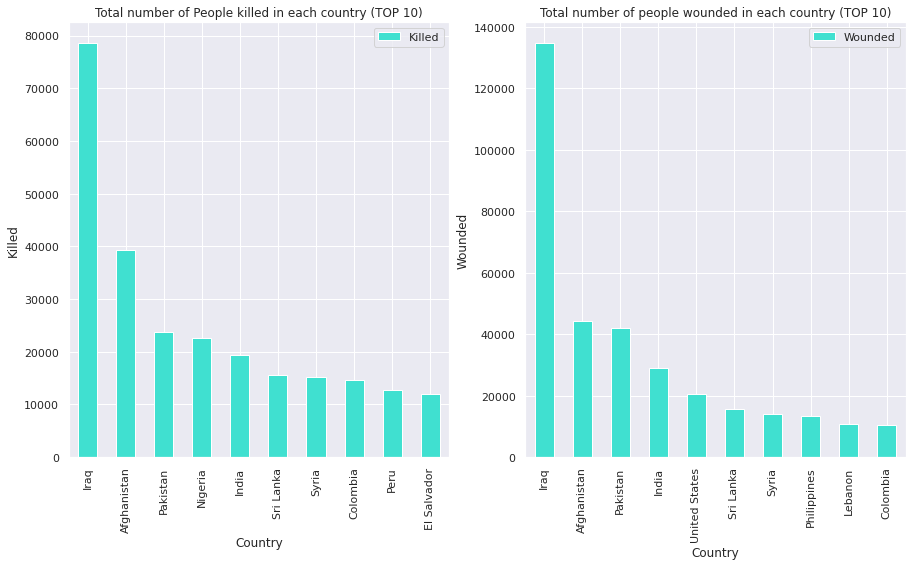

In [ ]:
Figure = plt.figure(figsize=(15,8))
ax0=Figure.add_subplot(1,2,1)
ax1=Figure.add_subplot(1,2,2)

Country_Killed[:10].plot(kind='bar', color='Turquoise', ax=ax0)
plt.xticks(rotation=90)
ax0.set_xlabel('Country')
ax0.set_ylabel('Killed')
ax0.set_title('Total number of People killed in each country (TOP 10)')

Country_Wounded[:10].plot(kind='bar', color='Turquoise', ax=ax1)
plt.xticks(rotation=90)
ax1.set_xlabel('Country')
ax1.set_ylabel('Wounded')
ax1.set_title('Total number of people wounded in each country (TOP 10)')

In [ ]:
Country_Casualties=Terror_Data[['Country','Casualties']].groupby('Country').sum().sort_values(by='Casualties',ascending=False)
Country_Casualties.head(10)

,Casualties
Country,
Iraq,213279.0
Afghanistan,83661.0
Pakistan,65860.0
India,48321.0
Nigeria,32921.0
Sri Lanka,31091.0
Syria,29338.0
Colombia,25026.0
United States,24473.0


Text(0.5, 1.0, 'Total number of people casualties in each country (TOP 10)')

<Figure size 1080x576 with 0 Axes>

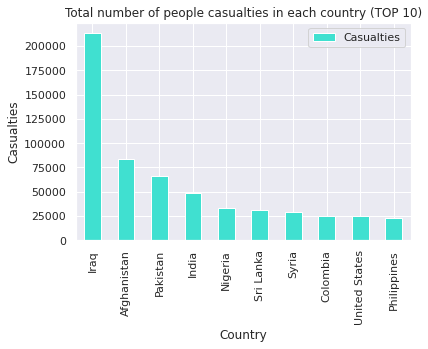

In [ ]:
Figure = plt.figure(figsize=(15,8))

Country_Casualties[:10].plot(kind='bar', color='Turquoise')
plt.xticks(rotation=90)
plt.xlabel('Country')
plt.ylabel('Casualties')
plt.title('Total number of people casualties in each country (TOP 10)')

Total number of people killed in each country (TOP 10) :-
1. Maximum - Iraq - 78589 people killed.
2. Minimum - El Salvador - 12053 people killed.

Total number of people wounded in each country (TOP 10) :-
1. Maximum - Iraq - 134690 people wounded.
2. Minimum - Colombia - 10328 people wounded.

Total number of people casualties in each country (TOP 10) :-
1. Maximum - Iraq - 213279 people casualties.
2. Minimum - Philippnes - 22926 people casualties.

**OBJECTIVE 13 -** *Find out the total number of people Killed,Wounded and Casualties in each (TOP 10) City?*

In [ ]:
City_Killed=Terror_Data[['City','Killed']].groupby('City').sum().sort_values(by='Killed',ascending=False)
City_Killed.drop('Unknown').head(10)

,Killed
City,
Baghdad,21151.0
Mosul,7140.0
Mogadishu,3913.0
Karachi,3688.0
New York City,2838.0
Tikrit,2679.0
Kabul,2493.0
Ramadi,2313.0
Maiduguri,2235.0


In [ ]:
City_Wounded=Terror_Data[['City','Wounded']].groupby('City').sum().sort_values(by='Wounded',ascending=False)
City_Wounded.drop('Unknown').head(10)

,Wounded
City,
Baghdad,56725.0
New York City,16781.0
Kabul,5973.0
Mosul,5787.0
Karachi,5688.0
Tokyo,5542.0
Beirut,5341.0
Nairobi,5024.0
Kirkuk,5008.0


Text(0.5, 1.0, 'Total number of people wounded in each city (TOP 10)')

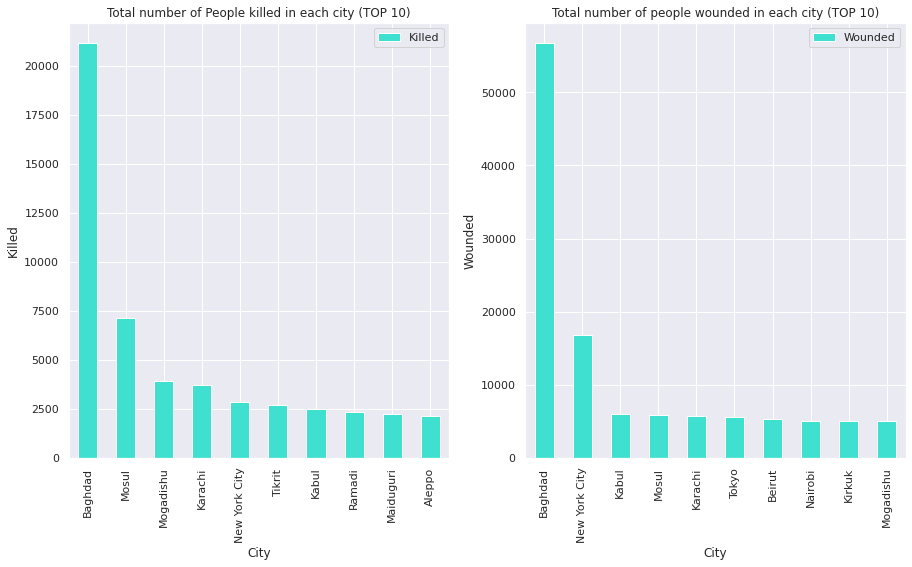

In [ ]:
Figure = plt.figure(figsize=(15,8))
ax0=Figure.add_subplot(1,2,1)
ax1=Figure.add_subplot(1,2,2)

City_Killed[:11].drop('Unknown').plot(kind='bar', color='Turquoise', ax=ax0)
plt.xticks(rotation=90)
ax0.set_xlabel('City')
ax0.set_ylabel('Killed')
ax0.set_title('Total number of People killed in each city (TOP 10)')

City_Wounded[:11].drop('Unknown').plot(kind='bar', color='Turquoise', ax=ax1)
plt.xticks(rotation=90)
ax1.set_xlabel('City')
ax1.set_ylabel('Wounded')
ax1.set_title('Total number of people wounded in each city (TOP 10)')

In [ ]:
City_Casualties=Terror_Data[['City','Casualties']].groupby('City').sum().sort_values(by='Casualties',ascending=False)
City_Casualties.drop('Unknown').head(10)

,Casualties
City,
Baghdad,77876.0
New York City,19619.0
Mosul,12927.0
Karachi,9376.0
Mogadishu,8868.0
Kabul,8466.0
Beirut,7257.0
Kirkuk,6636.0
Colombo,5906.0


Text(0.5, 1.0, 'Total number of people casualties in each city (TOP 10)')

<Figure size 1080x576 with 0 Axes>

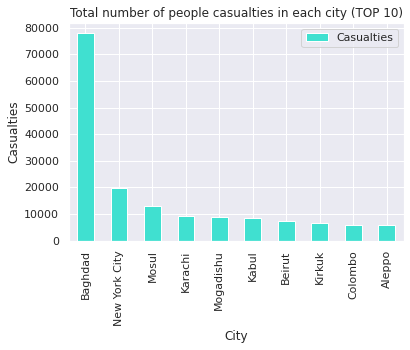

In [ ]:
Figure = plt.figure(figsize=(15,8))

City_Casualties[:11].drop('Unknown').plot(kind='bar', color='Turquoise')
plt.xticks(rotation=90)
plt.xlabel('City')
plt.ylabel('Casualties')
plt.title('Total number of people casualties in each city (TOP 10)')

Total number of people killed in each city (TOP 10) :-
1. Maximum - Baghdad - 21151 people killed.
2. Minimum - Aleppo - 2125 people killed.

Total number of people wounded in each city (TOP 10) :-
1. Maximum - Baghdad - 56725 people wounded.
2. Minimum - Mogadishu - 4955 people wounded.

Total number of people casualties in each city (TOP 10) :-
1. Maximum - Baghdad - 77876 people casualties.
2. Minimum - Aleppo - 5748 people casualties.

**Objective 14 :-** *Calculate humanity affected by terrorism world wide from 1970 to 2017?*

In [ ]:
Kill=Terror_Data.loc[:,'Killed'].sum()
print('Total number of people killed across the world is',Kill)

Total number of people killed across the world is 411868.0


In [ ]:
Wound=Terror_Data.loc[:,'Wounded'].sum()
print('Total number of people wounded across the world is',Wound)

Total number of people wounded across the world is 523869.0


In [ ]:
Casualty=Terror_Data.loc[:,'Casualties'].sum()
print('Total number of casualties across the world is',Casualty)

Total number of casualties across the world is 935737.0


**CONCLUSION :-**

1. The highest number of Terrorist activities took place in the year 2014 with 16903 attacks. The least number of attacks took place in the year 1971 with 471 attacks.

2. In the year 1970, 651 attacks occured and in the year 2017, 10900 attacks occured. The percentage of attack increased between 1970 and 2017 is 94%.

3. From Correlation Analysis, both variables, i.e. 'Killed' and 'Wounded' have Low Positive Correlation.

4. The highest number of Attack Type is Bombing/Explosion - 88255. The least number of Attack Type is Hijacking - 651 attacks.

5. The most Target Type by Terrorist is Private Citizens & Property. The second most Target Type is Military and then Police.

6. The most affected country is Iraq - 24636 attacks. The least affected country is Egypt - 2479 attacks. (TOP 20 Countries taken)

7. Middle East and North Africa is the most affected region - 50474 attacks.

8. The most affected city is Baghdad - 9775 attacks.The least affected city is Medellin - 848 attacks.(TOP 15 Cities taken)

9. Taliban is the most active terrorist organization.

10. In the year 1970 to 2000, the terrorist activities were vey frequent. After 2010, we can see the rise of terrorist activity in Middle East and North Africa, South Asia and Sub Saharan Desert.

11. Total number of people killed in each region (TOP 10) :-
Maximum - Middle East and North Africa - 137642 people killed. Minimum - East Asia - 1152 people killed.


Total number of people wounded in each region (TOP 10) :-
Maximum - Middle East and North Africa - 214308 people wounded. Minimum - Central America and Caribbean - 8991 people wounded.


Total number of people casualties in each region (TOP 10) :-
Maximum - Middle East and North Africa - 351950 people casualties. Minimum - East Asia - 10365 people casualties.

12. Total number of people killed in each country (TOP 10) :-
Maximum - Iraq - 78589 people killed. Minimum - El Salvador - 12053 people killed.

Total number of people wounded in each country (TOP 10) :-
Maximum - Iraq - 134690 people wounded. Minimum - Colombia - 10328 people wounded.

Total number of people casualties in each country (TOP 10) :-
Maximum - Iraq - 213279 people casualties. Minimum - Philippnes - 22926 people casualties.

13. Total number of people killed in each city (TOP 10) :-
Maximum - Baghdad - 21151 people killed. Minimum - Aleppo - 2125 people killed.

Total number of people wounded in each city (TOP 10) :-
Maximum - Baghdad - 56725 people wounded. Minimum - Mogadishu - 4955 people wounded.

Total number of people casualties in each city (TOP 10) :-
Maximum - Baghdad - 77876 people casualties. Minimum - Aleppo - 5748 people casualties.

14. Humanity affected by terrorism worldwide from 1970 to 2017 :-
Killed - 411868,
Wounded - 523869,
Casualties - 935737.